### XGBoost ###

In [1]:
# Importing useful packages
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

## Importing data
data = pd.read_csv("MinMax.csv", index_col=0, header=0)
data.head()

,IncRat,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType,UPB,Portfolio_Worthy,Year,Bank,MortDate,Assigned_ID
0,1.5112,0.84,2,2,1,2,1,0.2174,0.3683,4,7,0.748225,1,2016,Atlanta,2015,2004452
1,0.7347,0.76,2,2,1,2,1,0.1850,0.2385,4,1,0.203867,1,2016,Atlanta,2015,2004453
2,0.8536,0.80,1,2,1,2,1,0.2084,0.3817,4,1,0.229064,1,2016,Atlanta,2015,2004454
3,1.4262,0.80,1,2,1,2,1,0.1481,0.3170,4,1,0.302986,1,2016,Atlanta,2015,2004455
4,2.0272,0.89,1,2,1,2,1,0.2072,0.3184,4,7,0.774628,1,2016,Atlanta,2015,2004456


In [2]:
# Creating variables
X = data.iloc[:,:-5]
y = data.Portfolio_Worthy

In [3]:
# Creating a data matrix
data_matrix = xgb.DMatrix(data=X,label=y)

D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Python\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20317)

In [5]:
# Starting the XGBoost Model
xgb_reg = xgb.XGBClassifier(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

## Fitting the xgboost model
xgb_reg.fit(X_train, y_train)

### Creating the 'predictors' variable
predictors = xgb_reg.predict(X_test)

[18:15:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [6]:
# Creating the RMSE Model/Output
rmse = np.sqrt(mean_squared_error(y_test, predictors))
print("RMSE: %f" % (rmse))

RMSE: 0.038838


### Cross-Validation  with XGBoost

In [7]:
# Creating the 'params' variable
params = {"objective":"reg:linear","colsample_bytree":0.3,"learning_rate":0.1,"max_depth":5,"alpha":10}
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=20317)

[18:15:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.462758,0.000136,0.462758,0.000079
1,0.423698,0.004480,0.423684,0.004526
2,0.392003,0.007256,0.391972,0.007072
3,0.366626,0.007886,0.366600,0.007609
4,0.339286,0.003277,0.339293,0.002317


49    0.141166
Name: test-rmse-mean, dtype: float64


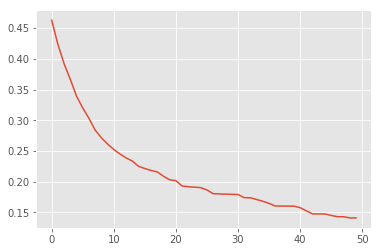

In [9]:
# Visualizing RMSE over the amount of rounds of boosting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

print((cv_results["test-rmse-mean"]).tail(1))

### Feature Importance ###

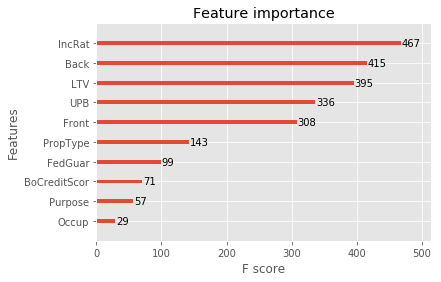

In [10]:
# Visualizing Feature Importance

xgb.plot_importance(xgb_reg)
#plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [11]:
# Exporting model
finalname = 'xgboost_model.p'
pickle.dump(xgb_reg, open(finalname, "wb"))